In [2]:
import numpy as np
from numpy import Inf
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import csv
import matplotlib.cm
import pandas as pd

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Was >= 40,000 time steps 1 times
Was <  40,000 time steps 299 times
Mean: 16481
Standard deviation: 3409


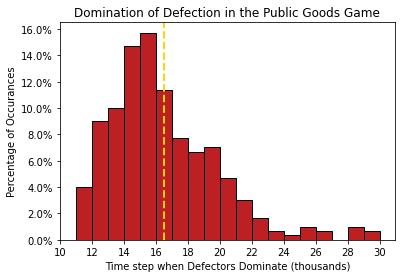

In [3]:
#when defectors dominate in PG

with open("PG_defectors_dominate.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [int(lines[2*i]) for i in range(round(len(lines)/2))]

#Number of times it was >= 40000
print("Was >= 40,000 time steps", lines.count(40000), "times")
lines =  [i/1000 for i in lines if i != 40000]
print("Was <  40,000 time steps", len(lines), "times")

print("Mean:", round(1000*round(np.mean(lines),3)))
print("Standard deviation:", round(1000*round(np.std(lines),3)))

#plot a histogram
ticks = range(int(np.floor(min(lines))), int(np.ceil(max(lines))) + 1, 1)
plt.hist(lines, weights=np.ones(len(lines)) / len(lines), bins=ticks, ec='black', color="#BC2023")
plt.axvline(np.mean(lines), color='gold', linestyle='dashed', linewidth=2)
ticks = range(2*int(np.floor(min(lines)/2)), 2*int(np.ceil(max(lines)/2)) + 2, 2)
plt.xticks(ticks)
plt.xlabel("Time Step when Defectors Dominate (thousands)")
plt.ylabel("Percentage of Occurrences")
plt.title("Domination of Defection in the Public Goods Game")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


## IR BASE
___

In [4]:
def plot_histo(filename, width, title, xlabel, colour, scale):
    with open(filename) as file:
        lines = [line.rstrip() for line in file]
    list(filter(('').__ne__, lines))
    lines = [float(lines[2*i]) for i in range(round(len(lines)/2))]
    
    lines = [i/scale for i in lines]

    print("Mean:", round(np.mean(lines)*scale,1))
    print("Standard deviation:", round(np.std(lines)*scale,1))
    
    lower = scale*(np.mean(lines) - 2*np.std(lines))
    upper = scale*(np.mean(lines) + 2*np.std(lines))

    print("Lower:", round(lower), "Upper:", round(upper))
    lines_std = [i for i in lines if i < upper/scale and i > lower/scale]
    print(len(lines), "values")
    print(len(lines_std), "values within 2stds", round(len(lines_std)*100/len(lines),1), "%")

    #plot a histogram
    ticks = range(int(min(lines)/width), int(max(lines)) + round(width/2), round(width/2))
    ticks = range(int(width/2*np.floor(min(lines)*2/width)), int(width/2*np.ceil(max(lines)*2/width)+width/2), round(width/2))
    plt.hist(lines, weights=np.ones(len(lines)) / len(lines),  bins = ticks, ec='black', color = colour)
    plt.axvline(np.mean(lines), color='gold', linestyle='dashed', linewidth=2)
    ticks = range(int(width*np.floor(min(lines)/width)), int(width*np.ceil(max(lines)/width) + width), int(width))
    plt.xticks(ticks)
    plt.xlabel(xlabel)
    plt.ylabel("Percentage of Occurrences")
    plt.title(title)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()
    
    print(lines.index(max(lines)))
    
   
    
    
    

Mean: 102.5
Standard deviation: 80.0
Lower: -57 Upper: 262
103 values
101 values within 2stds 98.1 %


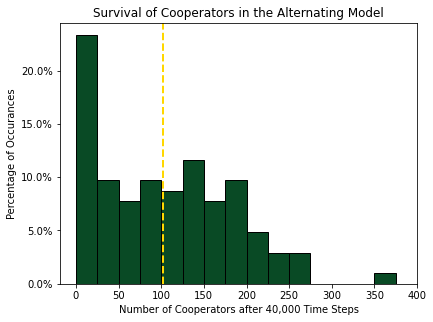

34
Defectors dominate in 15.533980582524272 % of trials


In [96]:
plot_histo("IR_base_final_coop.csv", 
           50,
           "Survival of Cooperators in the Alternating Model",  
           "Number of Cooperators after 40,000 Time Steps",
           "#094A25",
          1)

#add under final line of plot_histo
'''
print(lines.index(102))
print(lines.index(min(lines)))
'''
#max 34, min 3, 1 ends with 102 cooperators

with open("IR_base_final_coop.csv") as file:
    lines = [line.rstrip() for line in file]
    list(filter(('').__ne__, lines))
    lines = [float(lines[2*i]) for i in range(round(len(lines)/2))]
print("Defectors dominate in", lines.count(0)*100/len(lines), "% of trials")

Mean: 14750.7
Standard deviation: 4674.4
Lower: 5402 Upper: 24099
103 values
102 values within 2stds 99.0 %


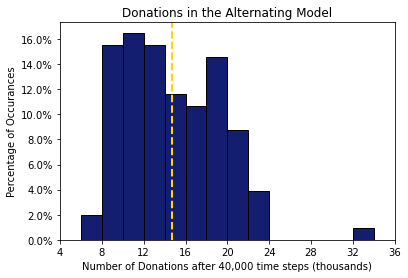

34


In [6]:
plot_histo("IR_base_final_don.csv", 
           4,
           "Donations in the Alternating Model",  
           "Number of Donations after 40,000 Time Steps (thousands)",
           "#131e70",
           1000)

DC mean: 338.7
Standard deviation: 172.7
Lower: -7 Upper: 684
103 values
102 values within 2stds 99.0 %


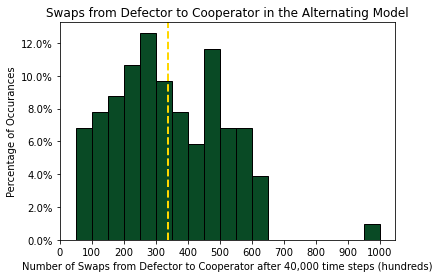

CD mean: 1039.1
Standard deviation: 106.5
Lower: 826 Upper: 1252
103 values
100 values within 2stds 97.1 %


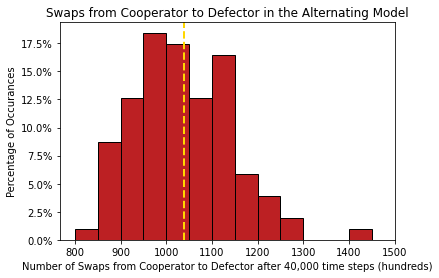

In [7]:
scale = 1
width = 100

with open("IR_base_final_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    

#dc swaps   
dc = [float(i[1])/scale for i in lines]
print("DC mean:", round(np.mean(dc)*scale,1))
print("Standard deviation:", round(np.std(dc)*scale,1))
    
lower = scale*(np.mean(dc) - 2*np.std(dc))
upper = scale*(np.mean(dc) + 2*np.std(dc))

print("Lower:", round(lower), "Upper:", round(upper))
dc_std = [i for i in dc if i < upper/scale and i > lower/scale]
print(len(dc), "values")
print(len(dc_std), "values within 2stds", round(len(dc_std)*100/len(dc),1), "%")

#plot a histogram
ticks = range(int(width/2*np.floor(min(dc)*2/width)), int(width/2*np.ceil(max(dc)*2/width)+width/2), round(width/2))
plt.hist(dc, weights=np.ones(len(dc)) / len(dc),  bins = ticks, ec='black', color = "#094A25")
plt.axvline(np.mean(dc), color='gold', linestyle='dashed', linewidth=2)
ticks = range(int(width*np.floor(min(dc)/width)), int(width*np.ceil(max(dc)/width) + width), int(width))
plt.xticks(ticks)
plt.xlabel("Number of Swaps from Defector to Cooperator after 40,000 Time Steps (hundreds)")
plt.ylabel("Percentage of Occurrences")
plt.title("Swaps from Defector to Cooperator in the Alternating Model")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



#cd swaps
cd = [float(i[0])/scale for i in lines]
print("CD mean:", round(np.mean(cd)*scale,1))
print("Standard deviation:", round(np.std(cd)*scale,1))
    
lower = scale*(np.mean(cd) - 2*np.std(cd))
upper = scale*(np.mean(cd) + 2*np.std(cd))

print("Lower:", round(lower), "Upper:", round(upper))
cd_std = [i for i in cd if i < upper/scale and i > lower/scale]
print(len(cd), "values")
print(len(cd_std), "values within 2stds", round(len(cd_std)*100/len(cd),1), "%")

#plot a histogram
ticks = range(int(width/2*np.floor(min(cd)*2/width)), int(width/2*np.ceil(max(cd)*2/width)+width/2), round(width/2))
plt.hist(cd, weights=np.ones(len(cd)) / len(cd),  bins = ticks, ec='black', color = "#BC2023")
plt.axvline(np.mean(cd), color='gold', linestyle='dashed', linewidth=2)
ticks = range(int(width*np.floor(min(cd)/width)), int(width*np.ceil(max(cd)/width) + width), int(width))
plt.xticks(ticks)
plt.xlabel("Number of Swaps from Cooperator to Defector after 40,000 Time Steps (hundreds)")
plt.ylabel("Percentage of Occurrences")
plt.title("Swaps from Cooperator to Defector in the Alternating Model")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

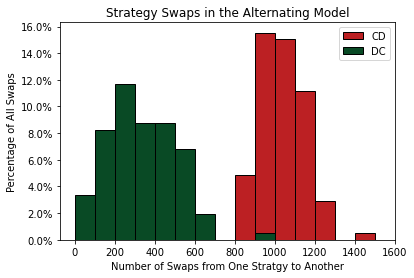

34 34


In [8]:
width = 200
total_swaps = len(cd) + len(dc)
bins = range(int(width/2*np.floor(min(dc)*2/width)), int(width/2*np.ceil(max(cd)*2/width)+width/2), round(width/2))
plt.hist(cd, weights=np.ones(len(cd)) / total_swaps, bins=bins, label='CD', color="#BC2023", ec="black")
plt.hist(dc, weights=np.ones(len(dc)) / total_swaps, bins=bins, label='DC', color="#094A25", ec="black")
plt.legend(loc='upper right')
ticks = range(int(width*np.floor(min(dc)/width)), int(width*np.ceil(max(cd)/width) + width), int(width))
plt.xticks(ticks)
plt.xlabel("Number of Swaps from One Stratgy to Another")
plt.ylabel("Percentage of All Swaps")
plt.title("Strategy Swaps in the Alternating Model")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print(cd.index(max(cd)), dc.index(max(dc)))

In [9]:
def plot_line(filename, title, ylabel, colour, legend_loc, height_unit):
    with open(filename) as file:
        lines = [line.rstrip() for line in file]
    list(filter(('').__ne__, lines))
    lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

    for i in range(len(lines)):
        for j in range(len(lines[i])):
            lines[i][j]= int(float(lines[i][j]))


    n = len(lines[0])
    means = np.zeros(n)
    p5 = np.zeros(n)
    p95 = np.zeros(n)


    for i in range(n):
        temp = []
        for j in range(len(lines)):
            temp.append(lines[j][i])
        means[i] = np.mean(temp)
        p5[i] = np.percentile(temp, 5)
        p95[i] = np.percentile(temp, 95)


    
    x = np.linspace(0, 40, n)
    ax = plt.gca()
    ax.set_xlim([0, 40])
    ax.set_ylim([0, round(np.ceil(np.max(p95)/height_unit))*height_unit])
    plt.plot(x, means, color=colour, label="Mean")
    plt.fill_between(x, p5, p95, alpha=0.5, color=colour, label="Percentiles")
    plt.xlabel("Time Step (thousands)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc=legend_loc)
    plt.show()
    
    
    

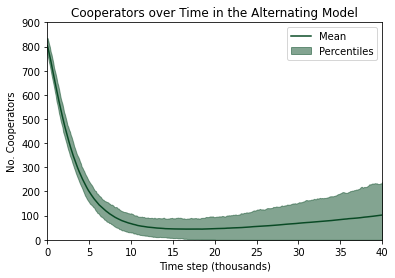

'\nx = np.linspace(0, 40, n)\n    ax = plt.gca()\n    ax.set_xlim([15, 40])\n    ax.set_ylim([0, 300])\n    plt.plot(x, means, color=colour, label="Mean")\n    plt.fill_between(x, p5, p95, alpha=0.5, color=colour, label="Percentiles")\n    plt.xlabel("Time step (thousands)")\n    plt.ylabel(ylabel)\n    plt.title(title)\n    plt.legend(loc=legend_loc)\n    plt.show()\n    \n    \n    change = [0] + [means[i] - means[i-1] for i in range(1,len(means))]\n    ax = plt.gca()\n    ax.set_xlim([14, 40])\n    ax.set_ylim([0, 1])\n    plt.plot(x,change)\n    plt.show()\n    \n    print(means[150],means[400])'

In [10]:
plot_line("IR_base_cooperators.csv", 
          "Cooperators over Time in the Alternating Model",
         "No. Cooperators",
         "#094A25",
         "upper right",
         100)

#put at end of plot_line
'''
x = np.linspace(0, 40, n)
    ax = plt.gca()
    ax.set_xlim([15, 40])
    ax.set_ylim([0, 300])
    plt.plot(x, means, color=colour, label="Mean")
    plt.fill_between(x, p5, p95, alpha=0.5, color=colour, label="Percentiles")
    plt.xlabel("Time Step (thousands)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc=legend_loc)
    plt.show()
    
    
    change = [0] + [means[i] - means[i-1] for i in range(1,len(means))]
    ax = plt.gca()
    ax.set_xlim([14, 40])
    ax.set_ylim([0, 1])
    plt.plot(x,change)
    plt.show()
    
    print(means[150],means[400])'''

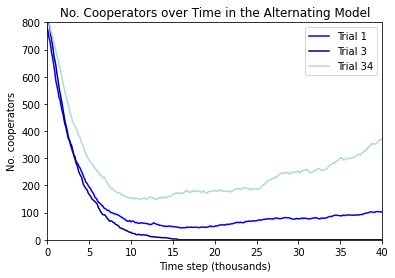

In [11]:
#custom colour map for use in visual representations of strategies
cmap = ListedColormap(["#BC2023", "#094A25"], N=2)

with open("IR_base_cooperators.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))


x = np.linspace(0, 40, 401)
ax = plt.gca()
ax.set_xlim([0, 40])
ax.set_ylim([0, 800])
plt.plot(x, lines[1], color="blue", label="Trial 1")
plt.plot(x, lines[3], color="darkblue", label="Trial 3")
plt.plot(x, lines[34], color="lightblue", label="Trial 34")
plt.xlabel("Time Step (thousands)")
plt.ylabel("No. cooperators")
plt.title("No. Cooperators over Time in the Alternating Model")
plt.legend(loc="upper right")
plt.show()

defectors dominate in 15.53 % trials


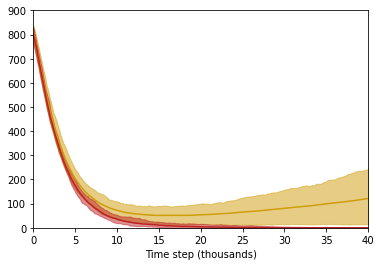

In [12]:
with open("IR_base_cooperators.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

defec_dom = []
coop_survive = []
n = len(lines[0])  
#split into scenarios where defectors did or didn't dominate
for i in range(len(lines)):
    if lines[i][n-1] == 0:
        defec_dom.append(lines[i])
    else:
        coop_survive.append(lines[i])

print("defectors dominate in", round(100*len(defec_dom)/len(lines),2), "% trials")

means_d = np.zeros(n)
p5_d = np.zeros(n)
p95_d = np.zeros(n)
means = np.zeros(n)
p5 = np.zeros(n)
p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(defec_dom)):
        temp.append(defec_dom[j][i])
    means_d[i] = np.mean(temp)
    p5_d[i] = np.percentile(temp, 5)
    p95_d[i] = np.percentile(temp, 95)
        
for i in range(n):
    temp = []
    for j in range(len(coop_survive)):
        temp.append(coop_survive[j][i])
    means[i] = np.mean(temp)
    p5[i] = np.percentile(temp, 5)
    p95[i] = np.percentile(temp, 95)        

x = np.linspace(0, 40, n)
ax = plt.gca()
ax.set_xlim([0, 40])
ax.set_ylim([0, round(np.ceil(np.max(p95_d)/100))*100])

plt.plot(x, means, color="#CE9D09", label="Mean")
plt.fill_between(x, p5, p95, alpha=0.5, color="#CE9D09", label="Percentiles")

plt.plot(x, means_d, color="#BC2023", label="Mean")
plt.fill_between(x, p5_d, p95_d, alpha=0.5, color="#BC2023", label="Percentiles")
plt.xlabel("Time Step (thousands)")
plt.show()  


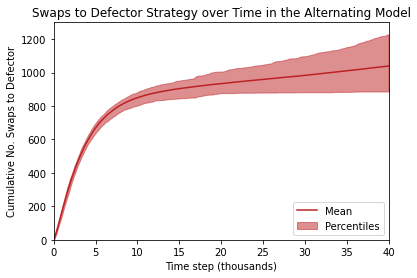

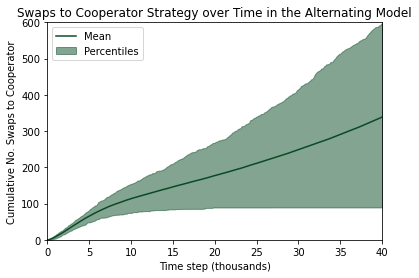

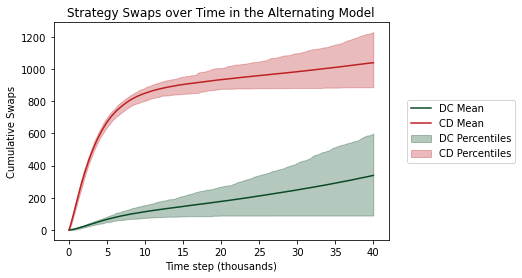

In [13]:
plot_line("IR_base_cd_swaps.csv", 
          "Swaps to Defector Strategy over Time in the Alternating Model",
         "Cumulative No. Swaps to Defector",
         "#BC2023",
         "lower right",
         100)
plot_line("IR_base_dc_swaps.csv", 
          "Swaps to Cooperator Strategy over Time in the Alternating Model",
         "Cumulative No. Swaps to Cooperator",
         "#094A25",
         "upper left",
         100)

with open("IR_base_dc_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
c_means = np.zeros(n)
c_p5 = np.zeros(n)
c_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    c_means[i] = np.mean(temp)
    c_p5[i] = np.percentile(temp, 5)
    c_p95[i] = np.percentile(temp, 95)

with open("IR_base_cd_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

d_means = np.zeros(n)
d_p5 = np.zeros(n)
d_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    d_means[i] = np.mean(temp)
    d_p5[i] = np.percentile(temp, 5)
    d_p95[i] = np.percentile(temp, 95)    
    
x = np.linspace(0, 40, n)
plt.plot(x, c_means, color="#094A25", label="DC Mean")
plt.fill_between(x, c_p5, c_p95, alpha=0.3, color="#094A25", label="DC Percentiles")
plt.plot(x, d_means, color="#BC2023", label="CD Mean")
plt.fill_between(x, d_p5, d_p95, alpha=0.3, color="#BC2023", label="CD Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Cumulative Swaps")
plt.title("Strategy Swaps over Time in the Alternating Model")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

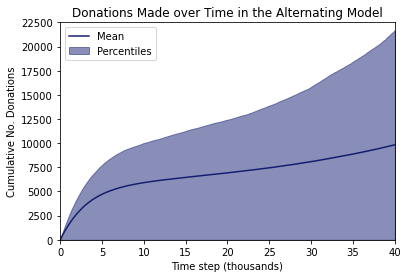

In [14]:
plot_line("IR_base_cum_don.csv", 
          "Donations Made over Time in the Alternating Model",
         "Cumulative No. Donations",
         "#131e70",
         "upper left",
         2500)

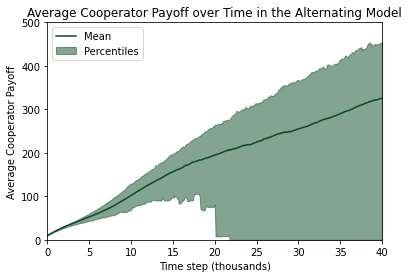

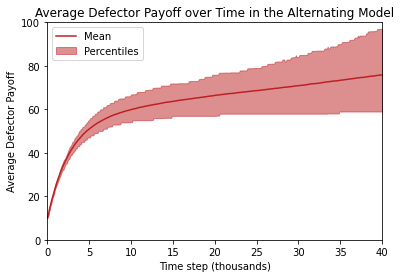

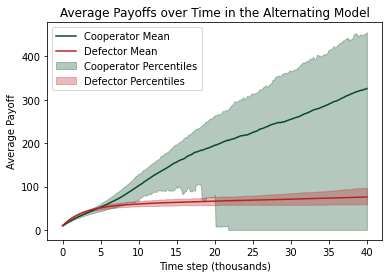

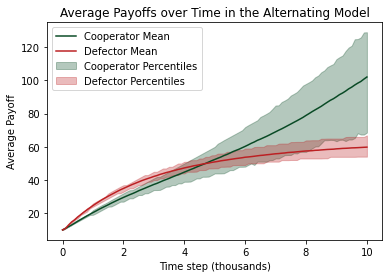

In [15]:
plot_line("IR_base_coop_payoff.csv", 
          "Average Cooperator Payoff over Time in the Alternating Model",
         "Average Cooperator Payoff",
         "#094A25",
         "upper left",
         100)
plot_line("IR_base_defec_payoff.csv", 
          "Average Defector Payoff over Time in the Alternating Model",
         "Average Defector Payoff",
         "#BC2023",
         "upper left",
         20)



with open("IR_base_coop_payoff.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
c_means = np.zeros(n)
c_p5 = np.zeros(n)
c_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    c_means[i] = np.mean(temp)
    c_p5[i] = np.percentile(temp, 5)
    c_p95[i] = np.percentile(temp, 95)

with open("IR_base_defec_payoff.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

d_means = np.zeros(n)
d_p5 = np.zeros(n)
d_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    d_means[i] = np.mean(temp)
    d_p5[i] = np.percentile(temp, 5)
    d_p95[i] = np.percentile(temp, 95)    
    
x = np.linspace(0, 40, n)
plt.plot(x, c_means, color="#094A25", label="Cooperator Mean")
plt.fill_between(x, c_p5, c_p95, alpha=0.3, color="#094A25", label="Cooperator Percentiles")
plt.plot(x, d_means, color="#BC2023", label="Defector Mean")
plt.fill_between(x, d_p5, d_p95, alpha=0.3, color="#BC2023", label="Defector Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Payoff")
plt.title("Average Payoffs over Time in the Alternating Model")
plt.legend(loc="upper left")
plt.show()

x = np.linspace(0, 10, 101)
plt.plot(x, c_means[:101], color="#094A25", label="Cooperator Mean")
plt.fill_between(x, c_p5[:101], c_p95[:101], alpha=0.3, color="#094A25", label="Cooperator Percentiles")
plt.plot(x, d_means[:101], color="#BC2023", label="Defector Mean")
plt.fill_between(x, d_p5[:101], d_p95[:101], alpha=0.3, color="#BC2023", label="Defector Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Payoff")
plt.title("Average Payoffs over Time in the Alternating Model")
plt.legend(loc="upper left")
plt.show()

## IR RANGE
___

In [16]:
#some curves for us to optimise for lines of best fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c 

def sigmoid(x,a, b, c):
    return 1 / (a + b*np.exp(-c*x))

from scipy.stats import gamma
def gamma_f(x,a, b, c,d, e):
    return d*gamma.pdf(x,a, loc=b, scale=c) + e

from scipy.stats import poisson
def poisson_f(x,a,b,c):
    return a*poisson.pmf(x,a,loc=b)+c

<ipython-input-16-12e633ebcc01>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (a + b*np.exp(-c*x))


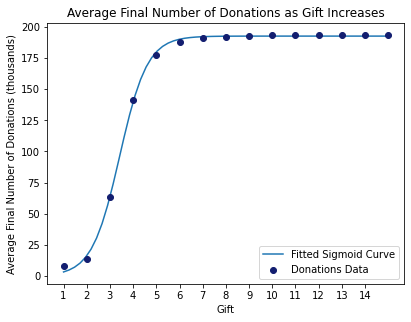

[0.00519388 1.61252277 1.67747488]
193.17343333333332
193.36579999999998
193.50133333333335
193.56366666666665
193.63183333333333


In [102]:
with open("IR_range_don.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    
don = [float(i[1])/1000 for i in lines]
x = range(1,16)
x_fine = np.linspace(1,15,60)
opt, pcov = curve_fit(sigmoid, x, don);



plt.plot(x_fine, sigmoid(x_fine, *opt), label="Fitted Sigmoid Curve");
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Donations (thousands)")
plt.title("Average Final Number of Donations as Gift Increases")
plt.scatter(x, don, label="Donations Data", color="#131e70",zorder=3)
plt.xticks(range(1,15))
plt.legend()
plt.show()

print(opt)
for i in range(10,15):
    print(don[i])

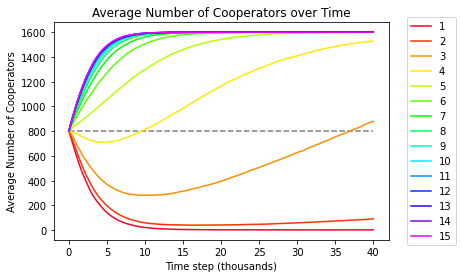

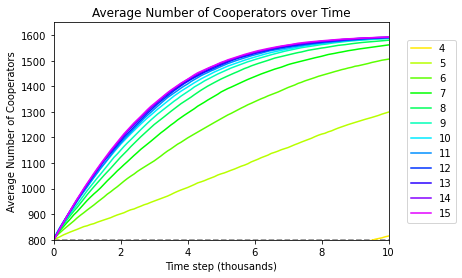

In [29]:
cmap = matplotlib.cm.get_cmap('gist_rainbow')

with open("IR_range_cooperators.csv") as file:
    lines = list(csv.reader(file))
lines = [lines[2*i][1] for i in range(round(len(lines)/2))]

cooperators = [[] for i in range(16)]
for i in range(1,16):
    string = lines[i-1]
    string = string[1:len(string)-1]
    
    cooperators[i] = string.split()
    cooperators[i] = [float(j) for j in cooperators[i]]


x = np.linspace(0,40,401)
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(1,16):
    plt.plot(x, cooperators[i], label=i, color=cmap((i-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

x = np.linspace(0,40,401)
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(4,16):
    plt.plot(x, cooperators[i], label=i, color=cmap((i-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.ylim(800,1650)
plt.xlim(0,10)
plt.show()


In [ ]:
final_coop = [cooperators[i][400] for i in range(1,16)]


plt.plot(x,final_coop, alpha=0.7, label="Linear Interpolation", color="#094A25", 
        linestyle='--')
plt.scatter(x, final_coop, color="#094A25", zorder=3, label="Average Value")
plt.axhline(y=800, color='grey', linestyle='-', zorder=-1, alpha=0.5)
plt.axhline(y=1600, color='grey', linestyle='-', zorder=-1, alpha = 0.5)
ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 1700])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Cooperators")
plt.title("Average Final Number of Cooperators as Gift Increases")
plt.legend()
plt.show()

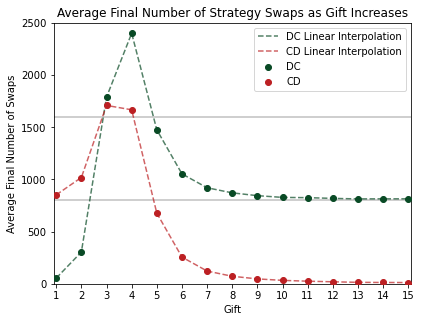

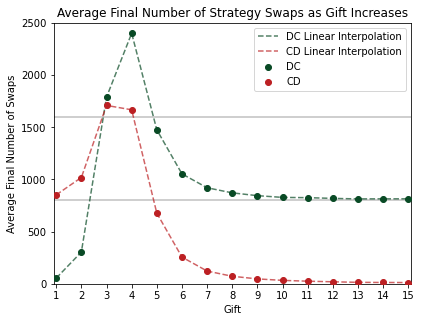

906.5999999999999 total swaps for gift 1
1322.7666666666667 total swaps for gift 2
3497.2333333333336 total swaps for gift 3
4067.2666666666664 total swaps for gift 4
2152.1 total swaps for gift 5
1308.9666666666667 total swaps for gift 6
1042.2333333333333 total swaps for gift 7
943.3333333333334 total swaps for gift 8
891.4666666666667 total swaps for gift 9
860.5666666666666 total swaps for gift 10
850.3333333333334 total swaps for gift 11
837.6999999999999 total swaps for gift 12
827.4666666666666 total swaps for gift 13
826.6999999999999 total swaps for gift 14
826.1666666666666 total swaps for gift 15


In [93]:
with open("IR_range_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    

#dc swaps   
dc = [float(i[1]) for i in lines]
cd = [float(i[2]) for i in lines]
x = range(1,16)
x_fine = np.linspace(1,15,600)

plt.plot(x, dc, alpha=0.7, label="DC Linear Interpolation", color="#094A25", 
        linestyle='--')
plt.scatter(x, dc, color="#094A25", zorder=3, label="DC")


plt.plot(x, cd, alpha=0.7, label="CD Linear Interpolation", color="#BC2023",
        linestyle='--')
plt.scatter(x, cd, color="#BC2023", zorder=3, label="CD")

plt.axhline(y=800, color='grey', linestyle='-', zorder=-1, alpha=0.5)
plt.axhline(y=1600, color='grey', linestyle='-', zorder=-1, alpha = 0.5)

ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 2500])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Swaps")
plt.title("Average Final Number of Strategy Swaps as Gift Increases")
plt.legend()
plt.show()


plt.plot(x, dc, alpha=0.7, label="DC Linear Interpolation", color="#094A25", 
        linestyle='--')
plt.scatter(x, dc, color="#094A25", zorder=3, label="DC")
plt.plot(x, cd, alpha=0.7, label="CD Linear Interpolation", color="#BC2023",
        linestyle='--')
plt.scatter(x, cd, color="#BC2023", zorder=3, label="CD")
plt.axhline(y=800, color='grey', linestyle='-', zorder=-1, alpha=0.5)
plt.axhline(y=1600, color='grey', linestyle='-', zorder=-1, alpha = 0.5)
ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 2500])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Swaps")
plt.title("Average Final Number of Strategy Swaps as Gift Increases")
plt.legend()
plt.show()

for i in range(15):
    print(cd[i]+dc[i], "total swaps for gift", i+1)

gift: 1 | defecs dominate in 90.0 % of trials | average defec dominate: 19078
gift: 2 | defecs dominate in 16.7 % of trials | average defec dominate: 29963


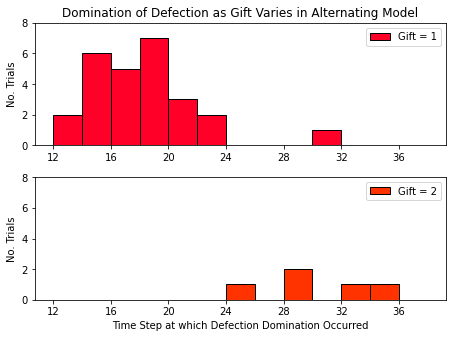

In [98]:
with open("IR_range_dom.csv") as file:
    lines = list(csv.reader(file))

lines = [lines[2*i] for i in range(round(len(lines)/2))]
lines = [i[1] for i in lines] 
lines = [i[1:len(i)-1] for i in lines]
n = len(lines)

defec_dom = [[] for i in lines]
for i in range(n):
    if lines[i] != '':
        defec_dom[i] = lines[i].split(",")
        defec_dom[i] = [float(j)/1000 for j in defec_dom[i]]

num = 0
for i in range(n):
    if len(defec_dom[i]) > 0:
        print("gift:", i+1, 
          "| defecs dominate in", round(10*len(defec_dom[i])/3,1),
          "% of trials | average defec dominate:", round(1000*np.mean(defec_dom[i])))
        num += 1




plt.subplot(num, 1, 1)
plt.title("Domination of Defection as Gift Varies in Alternating Model")
plt.ylabel("No. Trials")
plt.hist(defec_dom[0],  label = "Gift = 1",bins = range(12,40,2),  color=cmap(0/15), ec="black")
plt.xticks(range(12,40,4))
plt.yticks(range(0,10,2))
plt.legend()

plt.subplot(num, 1, 2)
plt.xlabel("Time Step at which Defection Domination Occurred")
plt.ylabel("No. Trials")
plt.hist(defec_dom[1],  label="Gift = 2",bins = range(12,40,2), color=cmap(1/15), ec="black")
plt.xticks(range(12,40,4))
plt.yticks(range(0,10,2))
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
with open("IR_range_dom.csv") as file:
    lines = list(csv.reader(file))

lines = [lines[2*i] for i in range(round(len(lines)/2))]
lines = [i[2] for i in lines] 
lines = [i[1:len(i)-1] for i in lines]
n = len(lines)

coop_dom = [[] for i in lines]
for i in range(n):
    if lines[i] != '':
        coop_dom[i] = lines[i].split(",")
        coop_dom[i] = [float(j)/1000 for j in coop_dom[i]]
        
coop_dom_means = [[i+1,100000] for i in range(15)]

num = 0
for i in range(n):
    if len(coop_dom[i]) > 0:
        print("gift:", i+1, 
          "| coops dominate in", round(10*len(coop_dom[i])/3,1),
          "% of trials | average coop dominate:", round(1000*np.mean(coop_dom[i])))
        num += 1
        coop_dom_means[i][1] = round(1000*np.mean(coop_dom[i]))

plots = [1,3,5,7,9,11,2,4,6,8,10]


plt.subplot(6, 2, 1)
plt.ylabel("No. Trials")
plt.hist(coop_dom[4],  label = "Gift = 5",bins = range(12,40,2),  color=cmap(4/15), ec="black")
plt.xticks(range(12,44,4))
plt.yticks(range(0,10,2))
plt.legend()

for i in range(1,num-6):
    plt.subplot(6, 2, plots[i])
    plt.ylabel("No. Trials")
    plt.hist(coop_dom[4+i],  label = (f"Gift = {i+5}"),bins = range(12,40,2),  color=cmap((4+i)/15), ec="black")
    plt.xticks(range(12,44,4))
    plt.yticks(range(0,14,2))
    plt.legend()

plt.subplot(6, 2, plots[5])
plt.ylabel("No. Trials")
plt.xlabel("Time Step at which Cooperators Dominate (thousands)")
plt.hist(coop_dom[9],  label = (f"Gift = {10}"),bins = range(12,40,2),  color=cmap((9)/15), ec="black")
plt.xticks(range(12,44,4))
plt.yticks(range(0,14,2))
plt.legend()

for i in range(num-5,num-1):
    plt.subplot(6, 2, plots[i])
    plt.hist(coop_dom[4+i],  label = (f"Gift = {i+5}"),bins = range(12,40,2),  color=cmap((4+i)/15), ec="black")
    plt.xticks(range(12,44,4))
    plt.yticks(range(0,14,2))
    plt.legend()

plt.subplot(6, 2, plots[num-1])
plt.hist(coop_dom[num+3],  label = (f"Gift = {num+4}"),bins = range(12,40,2),  color=cmap((num+3)/15), ec="black")
plt.xticks(range(12,44,4))
plt.yticks(range(0,14,2))
plt.xlabel("Time step at which Cooperators Dominate (thousands)")
plt.legend()

plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,20) #run twice to get right size
plt.show()



In [ ]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [ ]:
x = range(5,16)
print(x)
print(len(coop_dom_means))

plt.plot(x, [coop_dom_means[i][1] for i in x], alpha=0.7, label="DC Linear Interpolation", color="#094A25", 
        linestyle='--')
plt.scatter(x, [coop_dom_means[i][1] for i in x], color="#094A25", zorder=3, label="DC")
ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 40000])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Timestep of Domination")
plt.title("Average Time Until Strategy Domination as Gift Increases")
plt.legend()
plt.show()

## IR BINARY SEARCH FOR THRESHOLD
___

In [ ]:
cmap = matplotlib.cm.get_cmap('gist_rainbow')

with open("IR_bin_cooperators2.csv") as file:
    lines = list(csv.reader(file))


n = round(len(lines)/2)

gift_b = [float(lines[2*i][0]) for i in range(n)] + [3,4,5,2]
lines = [lines[2*i][1] for i in range(n)]

for i in range(n):
    print(lines[i])


cooperators_b = [[] for i in range(n+4)]

for i in range(n):
    string = lines[i-1]
    string = string[1:len(string)-1]
    
    cooperators_b[i] = string.split()
    cooperators_b[i] = [float(j) for j in cooperators_b[i]]
    

plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
plt.plot(x, cooperators_b[0], label=gift_b[0], color=cmap((gift_b[0]-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.ylim(0,200)
plt.show()


df = pd.DataFrame(
    {'Gift': gift_b,
     'Cooperators': cooperators_b
    })

for i in range(n+4):
    print(df.iat[i,0], df.iat[i,1][400])
    
df = df.sort_values('Gift')

print(df)
for i in range(n):
    gift_b[i] = df.iat[i,0]
    cooperators_b[i] = df.iat[i,1]
    print(gift_b[i], df.iat[i,1][400])
    
x = np.linspace(0,40,401)

plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(n):
    plt.plot(x, cooperators_b[i], label=gift_b[i], color=cmap((gift_b[i]-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()

print(gift_b[0])
print([cooperators_b[i][400] for i in range(len(cooperators_b))])

plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(n):
    plt.plot(x, cooperators_b[i], label=gift_b[i], color=cmap((gift_b[i]-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.ylim(0,200)
plt.show()



## SPATIAL BASE
___

Mean: 12.2
Standard deviation: 20.5
Lower: -29 Upper: 53
100 values
94 values within 2stds 94.0 %


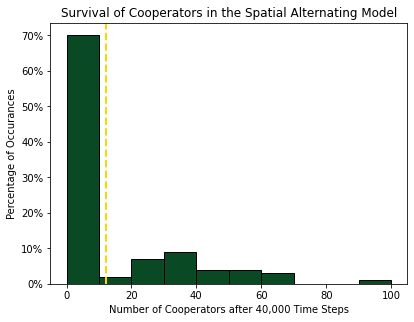

51
Defectors dominate in 61.0 % of trials


In [97]:
plot_histo("Spatial_base_final_coop.csv", 
           20,
           "Survival of Cooperators in the Spatial Alternating Model",  
           "Number of Cooperators after 40,000 Time Steps",
           "#094A25",
          1)

with open("Spatial_base_final_coop.csv") as file:
    lines = [line.rstrip() for line in file]
    list(filter(('').__ne__, lines))
    lines = [float(lines[2*i]) for i in range(round(len(lines)/2))]
print("Defectors dominate in", lines.count(0)*100/len(lines), "% of trials")

Mean: 62212.0
Standard deviation: 1093.5
Lower: 60025 Upper: 64399
100 values
96 values within 2stds 96.0 %


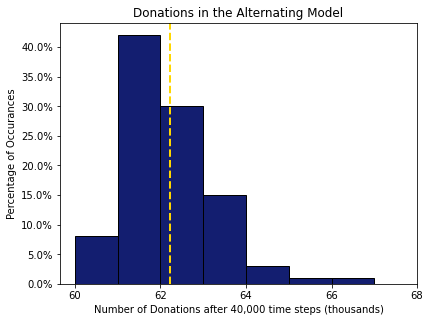

51


In [41]:
plot_histo("Spatial_base_final_don.csv", 
           2,
           "Donations in the Spatial Alternating Model",  
           "Number of Donations after 40,000 Time Steps (thousands)",
           "#131e70",
           1000)

DC mean: 118.1
Standard deviation: 56.9
Lower: 4 Upper: 232
100 values
96 values within 2stds 96.0 %

CD mean: 908.3
Standard deviation: 45.5
Lower: 817 Upper: 999
100 values
97 values within 2stds 97.0 %


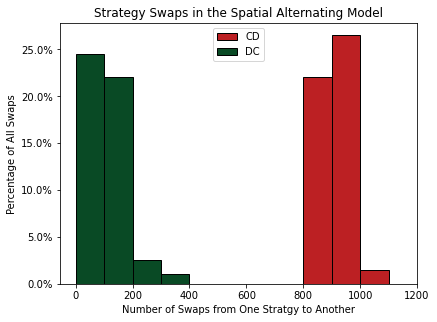

In [56]:
scale = 1
width = 100

with open("Spatial_base_final_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    

#dc swaps   
dc = [float(i[1])/scale for i in lines]
print("DC mean:", round(np.mean(dc)*scale,1))
print("Standard deviation:", round(np.std(dc)*scale,1))
    
lower = scale*(np.mean(dc) - 2*np.std(dc))
upper = scale*(np.mean(dc) + 2*np.std(dc))

print("Lower:", round(lower), "Upper:", round(upper))
dc_std = [i for i in dc if i < upper/scale and i > lower/scale]
print(len(dc), "values")
print(len(dc_std), "values within 2stds", round(len(dc_std)*100/len(dc),1), "%")

#cd swaps
cd = [float(i[0])/scale for i in lines]
print("\nCD mean:", round(np.mean(cd)*scale,1))
print("Standard deviation:", round(np.std(cd)*scale,1))
    
lower = scale*(np.mean(cd) - 2*np.std(cd))
upper = scale*(np.mean(cd) + 2*np.std(cd))

print("Lower:", round(lower), "Upper:", round(upper))
cd_std = [i for i in cd if i < upper/scale and i > lower/scale]
print(len(cd), "values")
print(len(cd_std), "values within 2stds", round(len(cd_std)*100/len(cd),1), "%")

width = 200
total_swaps = len(cd) + len(dc)
bins = range(int(width/2*np.floor(min(dc)*2/width)), int(width/2*np.ceil(max(cd)*2/width)+width/2), round(width/2))
plt.hist(cd, weights=np.ones(len(cd)) / total_swaps, bins=bins, label='CD', color="#BC2023", ec="black")
plt.hist(dc, weights=np.ones(len(dc)) / total_swaps, bins=bins, label='DC', color="#094A25", ec="black")
plt.legend(loc='upper center')
ticks = range(int(width*np.floor(min(dc)/width)), int(width*np.ceil(max(cd)/width) + width), int(width))
plt.xticks(ticks)
plt.xlabel("Number of Swaps from One Stratgy to Another")
plt.ylabel("Percentage of All Swaps")
plt.title("Strategy Swaps in the Spatial Alternating Model")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

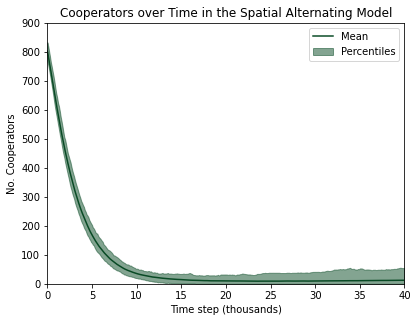

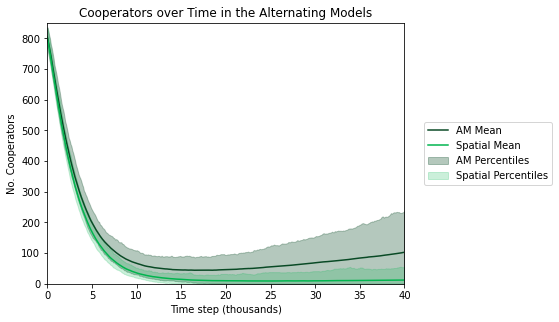

In [77]:
with open("Spatial_base_cooperators.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
means_s = np.zeros(n)
p5_s = np.zeros(n)
p95_s = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    means_s[i] = np.mean(temp)
    p5_s[i] = np.percentile(temp, 5)
    p95_s[i] = np.percentile(temp, 95)

    
with open("IR_base_cooperators.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
means = np.zeros(n)
p5 = np.zeros(n)
p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    means[i] = np.mean(temp)
    p5[i] = np.percentile(temp, 5)
    p95[i] = np.percentile(temp, 95)

    
    
    
plot_line("Spatial_base_cooperators.csv", 
          "Cooperators over Time in the Spatial Alternating Model",
         "No. Cooperators",
         "#094A25",
         "upper right",
         100)

x = np.linspace(0, 40, n)
plt.ylim(0,850)
plt.xlim(0,40)
plt.plot(x, means, color="#094A25", label="AM Mean")
plt.fill_between(x, p5, p95, alpha=0.3, color="#094A25", label="AM Percentiles")
plt.plot(x, means_s, color="#00b54e", label="Spatial Mean")
plt.fill_between(x, p5_s, p95_s, alpha=0.2, color="#00b54e", label="Spatial Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("No. Cooperators")
plt.title("Cooperators over Time in the Alternating Models")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

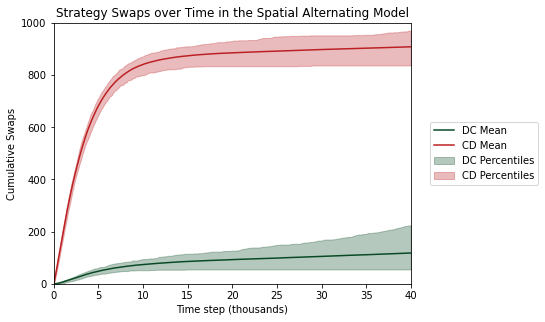

In [79]:
with open("Spatial_base_dc_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
c_means = np.zeros(n)
c_p5 = np.zeros(n)
c_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    c_means[i] = np.mean(temp)
    c_p5[i] = np.percentile(temp, 5)
    c_p95[i] = np.percentile(temp, 95)

with open("Spatial_base_cd_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

d_means = np.zeros(n)
d_p5 = np.zeros(n)
d_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    d_means[i] = np.mean(temp)
    d_p5[i] = np.percentile(temp, 5)
    d_p95[i] = np.percentile(temp, 95)    
    
x = np.linspace(0, 40, n)
plt.plot(x, c_means, color="#094A25", label="DC Mean")
plt.fill_between(x, c_p5, c_p95, alpha=0.3, color="#094A25", label="DC Percentiles")
plt.plot(x, d_means, color="#BC2023", label="CD Mean")
plt.fill_between(x, d_p5, d_p95, alpha=0.3, color="#BC2023", label="CD Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Cumulative Swaps")
plt.title("Strategy Swaps over Time in the Spatial Alternating Model")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.ylim(0,1000)
plt.xlim(0,40)
plt.show()

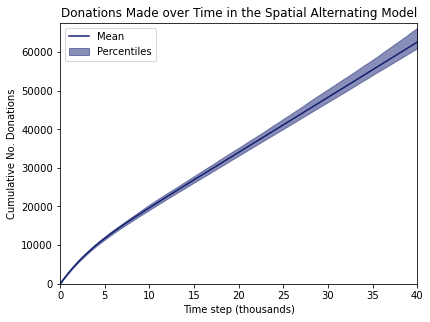

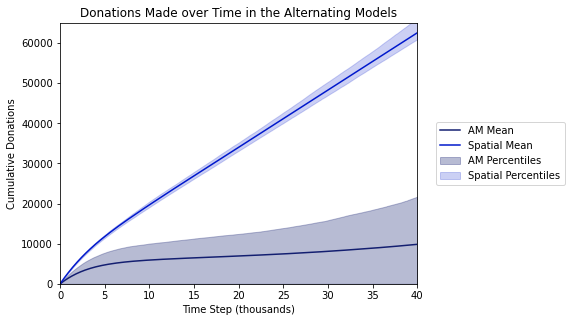

In [115]:
plot_line("Spatial_base_cum_don2.csv", 
          "Donations Made over Time in the Spatial Alternating Model",
         "Cumulative No. Donations",
         "#131e70",
         "upper left",
         2500)

with open("Spatial_base_cum_don2.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
means_s = np.zeros(n)
p5_s = np.zeros(n)
p95_s = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    means_s[i] = np.mean(temp)
    p5_s[i] = np.percentile(temp, 5)
    p95_s[i] = np.percentile(temp, 95)

  
with open("IR_base_cum_don.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
means = np.zeros(n)
p5 = np.zeros(n)
p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    means[i] = np.mean(temp)
    p5[i] = np.percentile(temp, 5)
    p95[i] = np.percentile(temp, 95)

    
x = np.linspace(0, 40, n)
plt.plot(x, means, color="#131e70", label="AM Mean")
plt.fill_between(x, p5, p95, alpha=0.3, color="#131e70", label="AM Percentiles")
plt.plot(x, means_s, color="#0018cc", label="Spatial Mean")
plt.fill_between(x, p5_s, p95_s, alpha=0.2, color="#0018cc", label="Spatial Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Cumulative Donations")
plt.title("Donations Made over Time in the Alternating Models")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.ylim(0,65000)
plt.xlim(0,40)
plt.show()


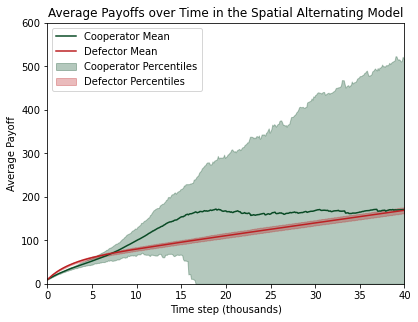

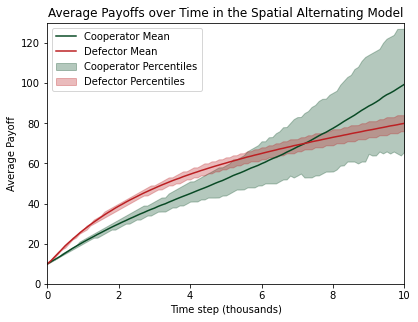

In [82]:
with open("Spatial_base_coop_payoff.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

n = len(lines[0])
c_means = np.zeros(n)
c_p5 = np.zeros(n)
c_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    c_means[i] = np.mean(temp)
    c_p5[i] = np.percentile(temp, 5)
    c_p95[i] = np.percentile(temp, 95)

with open("Spatial_base_defec_payoff.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]= int(float(lines[i][j]))

d_means = np.zeros(n)
d_p5 = np.zeros(n)
d_p95 = np.zeros(n)


for i in range(n):
    temp = []
    for j in range(len(lines)):
        temp.append(lines[j][i])
    d_means[i] = np.mean(temp)
    d_p5[i] = np.percentile(temp, 5)
    d_p95[i] = np.percentile(temp, 95)    
    
x = np.linspace(0, 40, n)
plt.plot(x, c_means, color="#094A25", label="Cooperator Mean")
plt.fill_between(x, c_p5, c_p95, alpha=0.3, color="#094A25", label="Cooperator Percentiles")
plt.plot(x, d_means, color="#BC2023", label="Defector Mean")
plt.fill_between(x, d_p5, d_p95, alpha=0.3, color="#BC2023", label="Defector Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Payoff")
plt.title("Average Payoffs over Time in the Spatial Alternating Model")
plt.legend(loc="upper left")
plt.ylim(0,600)
plt.xlim(0,40)
plt.show()

x = np.linspace(0, 10, 101)
plt.plot(x, c_means[:101], color="#094A25", label="Cooperator Mean")
plt.fill_between(x, c_p5[:101], c_p95[:101], alpha=0.3, color="#094A25", label="Cooperator Percentiles")
plt.plot(x, d_means[:101], color="#BC2023", label="Defector Mean")
plt.fill_between(x, d_p5[:101], d_p95[:101], alpha=0.3, color="#BC2023", label="Defector Percentiles")
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Payoff")
plt.title("Average Payoffs over Time in the Spatial Alternating Model")
plt.legend(loc="upper left")
plt.ylim(0,130)
plt.xlim(0,10)
plt.show()

## SPATIAL RANGE
___

In [87]:
with open("Spatial_base_cum_rep_known.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    
rep_known = [float(i[400])/1000 for i in lines]

print(np.mean(rep_known), 100*np.mean(rep_known)/(40*5),"%")

144.48775999999998 72.24387999999999 %


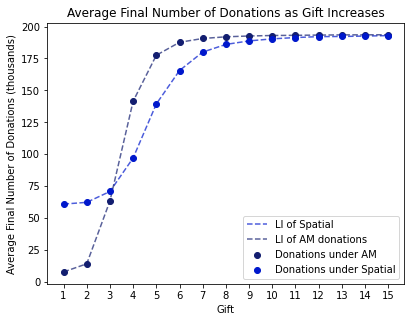

193.17343333333332 191.41986666666668
193.36579999999998 192.1445
193.50133333333335 192.26343333333332
193.56366666666665 192.59213333333332
193.63183333333333 192.94456666666667


In [104]:
with open("Spatial_range_don.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    
don_s = [float(i[1])/1000 for i in lines]
x = range(1,16)



plt.plot(x, don_s, alpha=0.7, label="LI of Spatial", color="#0018cc", 
        linestyle='--')
plt.scatter(x, don, label="Donations under AM", color="#131e70",zorder=3)
plt.plot(x, don, alpha=0.7, label="LI of AM donations", color="#131e70", 
        linestyle='--')
plt.scatter(x, don_s, label="Donations under Spatial", color="#0018cc",zorder=3)
plt.xlabel("Gift")
plt.xticks(range(1,16,1))
plt.ylabel("Average Final Number of Donations (thousands)")
plt.title("Average Final Number of Donations as Gift Increases")
plt.legend(loc="lower right")
plt.show()

for i in range(10,15):
    print(don[i], don_s[i])

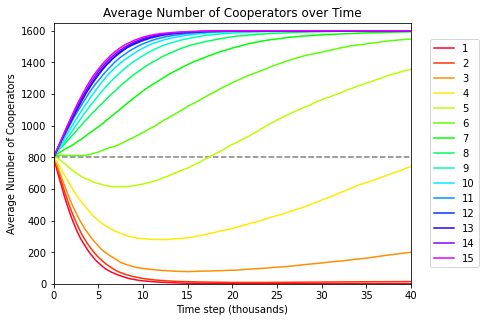

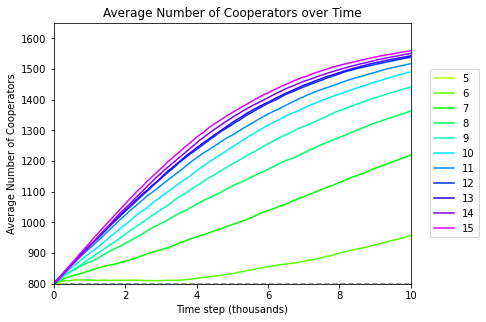

In [83]:
cmap = matplotlib.cm.get_cmap('gist_rainbow')

with open("Spatial_range_cooperators.csv") as file:
    lines = list(csv.reader(file))

lines = [lines[2*i][1] for i in range(round(len(lines)/2))]

cooperators_s = [[] for i in range(16)]
for i in range(1,16):
    string = lines[i-1]
    string = string[1:len(string)-1]
    
    cooperators_s[i] = string.split()
    cooperators_s[i] = [float(j) for j in cooperators_s[i]]


x = np.linspace(0,40,401)
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(1,16):
    plt.plot(x, cooperators_s[i], label=i, color=cmap((i-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.ylim(0,1650)
plt.xlim(0,40)
plt.show()

x = np.linspace(0,40,401)
plt.xlabel("Time Step (thousands)")
plt.ylabel("Average Number of Cooperators")
plt.title("Average Number of Cooperators over Time")
plt.plot(x,[800 for i in range(401)], color = "grey", linestyle = "--")
for i in range(5,16):
    plt.plot(x, cooperators_s[i], label=i, color=cmap((i-1)/15))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.ylim(800,1650)
plt.xlim(0,10)
plt.show()


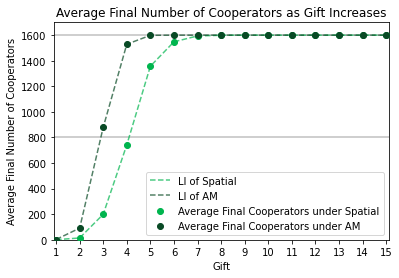

In [30]:
x = np.linspace(1,15,15)
final_coop = [cooperators[i][400] for i in range(1,16)]
final_coop_s = [cooperators_s[i][400] for i in range(1,16)]

plt.plot(x,final_coop_s, alpha=0.7, label="LI of Spatial", color="#00b54e", 
        linestyle='--')
plt.scatter(x, final_coop_s, color="#00b54e", zorder=3, label="Average Final Cooperators under Spatial")
plt.plot(x,final_coop, alpha=0.7, label="LI of AM", color="#094A25", 
        linestyle='--')
plt.scatter(x, final_coop, color="#094A25", zorder=3, label="Average Final Cooperators under AM")
plt.axhline(y=800, color='grey', linestyle='-', zorder=-1, alpha=0.5)
plt.axhline(y=1600, color='grey', linestyle='-', zorder=-1, alpha = 0.5)
ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 1700])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Cooperators")
plt.title("Average Final Number of Cooperators as Gift Increases")
plt.legend()
plt.show()

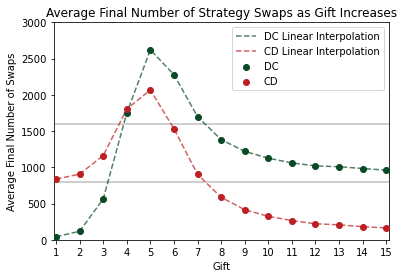

In [31]:
with open("Spatial_range_swaps.csv") as file:
    lines = [line.rstrip() for line in file]
list(filter(('').__ne__, lines))
lines = [(lines[2*i].split(",")) for i in range(round(len(lines)/2))]
    

#dc swaps   
dc = [float(i[1]) for i in lines]
cd = [float(i[2]) for i in lines]
x = range(1,16)
x_fine = np.linspace(1,15,600)




plt.plot(x, dc, alpha=0.7, label="DC Linear Interpolation", color="#094A25", 
        linestyle='--')
plt.scatter(x, dc, color="#094A25", zorder=3, label="DC")
plt.plot(x, cd, alpha=0.7, label="CD Linear Interpolation", color="#BC2023",
        linestyle='--')
plt.scatter(x, cd, color="#BC2023", zorder=3, label="CD")
plt.axhline(y=800, color='grey', linestyle='-', zorder=-1, alpha=0.5)
plt.axhline(y=1600, color='grey', linestyle='-', zorder=-1, alpha = 0.5)
ax = plt.gca()
ax.set_xlim([0.9, 15.1])
ax.set_ylim([0, 3000])
plt.xticks(range(1,16))
plt.xlabel("Gift")
plt.ylabel("Average Final Number of Swaps")
plt.title("Average Final Number of Strategy Swaps as Gift Increases")
plt.legend()
plt.show()

gift: 1 | defecs dominate in 96.7 % of trials | average defec dominate: 19022
gift: 2 | defecs dominate in 66.7 % of trials | average defec dominate: 21922
gift: 3 | defecs dominate in 3.3 % of trials | average defec dominate: 34627


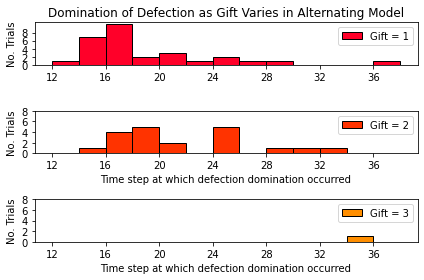

In [32]:
with open("Spatial_range_dom.csv") as file:
    lines = list(csv.reader(file))

lines = [lines[2*i] for i in range(round(len(lines)/2))]
lines = [i[1] for i in lines] 
lines = [i[1:len(i)-1] for i in lines]
n = len(lines)

defec_dom = [[] for i in lines]
for i in range(n):
    if lines[i] != '':
        defec_dom[i] = lines[i].split(",")
        defec_dom[i] = [float(j)/1000 for j in defec_dom[i]]

num = 0
for i in range(n):
    if len(defec_dom[i]) > 0:
        print("gift:", i+1, 
          "| defecs dominate in", round(10*len(defec_dom[i])/3,1),
          "% of trials | average defec dominate:", round(1000*np.mean(defec_dom[i])))
        num += 1




plt.subplot(num, 1, 1)
plt.title("Domination of Defection as Gift Varies in Alternating Model")
plt.ylabel("No. Trials")
plt.hist(defec_dom[0],  label = "Gift = 1",bins = range(12,40,2),  color=cmap(0/15), ec="black")
plt.xticks(range(12,40,4))
plt.yticks(range(0,10,2))
plt.legend()

plt.subplot(num, 1, 2)
plt.ylabel("No. Trials")
plt.hist(defec_dom[1],  label="Gift = 2",bins = range(12,40,2), color=cmap(1/15), ec="black")
plt.xticks(range(12,40,4))
plt.yticks(range(0,10,2))
plt.legend()

plt.subplot(num, 1, 3)
plt.xlabel("Time Step at which Defection Domination Occurred")
plt.ylabel("No. Trials")
plt.hist(defec_dom[2],  label="Gift = 3",bins = range(12,40,2), color=cmap(2/15), ec="black")
plt.xticks(range(12,40,4))
plt.yticks(range(0,10,2))
plt.legend()

plt.tight_layout()
plt.show()


gift: 7 | coops dominate in 3.3 % of trials | average coop dominate: 38996
gift: 8 | coops dominate in 63.3 % of trials | average coop dominate: 32272
gift: 9 | coops dominate in 96.7 % of trials | average coop dominate: 29928
gift: 10 | coops dominate in 96.7 % of trials | average coop dominate: 27053
gift: 11 | coops dominate in 100.0 % of trials | average coop dominate: 23091
gift: 12 | coops dominate in 100.0 % of trials | average coop dominate: 22094
gift: 13 | coops dominate in 100.0 % of trials | average coop dominate: 20724
gift: 14 | coops dominate in 100.0 % of trials | average coop dominate: 20316
gift: 15 | coops dominate in 100.0 % of trials | average coop dominate: 19899


<ipython-input-34-902544e36c58>:62: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


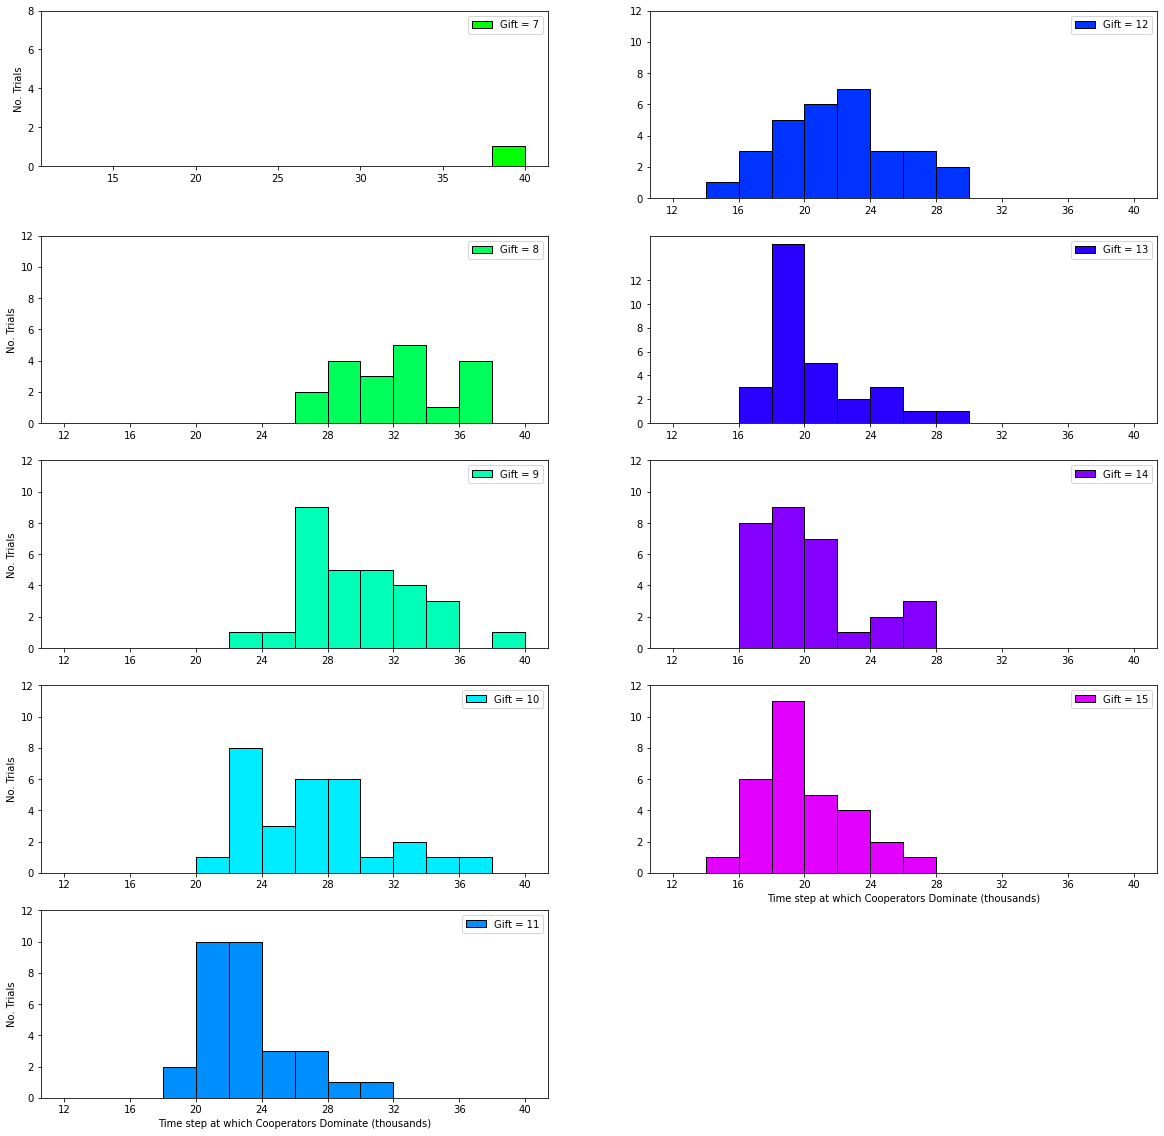

In [34]:
with open("Spatial_range_dom.csv") as file:
    lines = list(csv.reader(file))

lines = [lines[2*i] for i in range(round(len(lines)/2))]
lines = [i[2] for i in lines] 
lines = [i[1:len(i)-1] for i in lines]
n = len(lines)

coop_dom = [[] for i in lines]
for i in range(n):
    if lines[i] != '':
        coop_dom[i] = lines[i].split(",")
        coop_dom[i] = [float(j)/1000 for j in coop_dom[i]]

num = 0
for i in range(n):
    if len(coop_dom[i]) > 0:
        print("gift:", i+1, 
          "| coops dominate in", round(10*len(coop_dom[i])/3,1),
          "% of trials | average coop dominate:", round(1000*np.mean(coop_dom[i])))
        num += 1

plots = [1,3,5,7,9,2,4,6,8]

plt.subplot(6, 2, 1)
plt.ylabel("No. Trials")
plt.hist(coop_dom[6],  label = "Gift = 7",  bins = range(12,42,2), color=cmap(6/15), ec="black")
plt.yticks(range(0,10,2))
plt.legend()

for i in range(1,4):
    plt.subplot(5, 2, plots[i])
    plt.ylabel("No. Trials")
    plt.hist(coop_dom[6+i],  label = (f"Gift = {i+7}"),bins = range(12,42,2),  color=cmap((6+i)/15), ec="black")
    plt.xticks(range(12,44,4))
    plt.yticks(range(0,14,2))
    plt.legend()

plt.subplot(5, 2, plots[4])
plt.ylabel("No. Trials")
plt.xlabel("Time Step at which Cooperators Dominate (thousands)")
plt.hist(coop_dom[10],  label = (f"Gift = {11}"),bins = range(12,42,2),  color=cmap((10)/15), ec="black")
plt.xticks(range(12,44,4))
plt.yticks(range(0,14,2))
plt.legend()

for i in range(5,num-1):
    plt.subplot(5, 2, plots[i])
    plt.hist(coop_dom[6+i],  label = (f"Gift = {i+7}"),bins = range(12,42,2),  color=cmap((6+i)/15), ec="black")
    plt.xticks(range(12,44,4))
    plt.yticks(range(0,14,2))
    plt.legend()

plt.subplot(5, 2, plots[num-1])
plt.hist(coop_dom[num+5],  label = (f"Gift = {num+6}"),bins = range(12,42,2),  color=cmap((num+5)/15), ec="black")
plt.xticks(range(12,44,4))
plt.yticks(range(0,14,2))
plt.xlabel("Time Step at which Cooperators Dominate (thousands)")
plt.legend()

plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,20) #run twice to get right size
plt.show()



In [36]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]